Código que corre la segmentación de tot segmentator con MR.

Module, adn verify cuda


In [1]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.version.cuda)

NVIDIA GeForce RTX 5080
12.8


In [2]:
import os
import tarfile
import shutil
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import numpy as np


from ipywidgets import interact
from IPython.display import display

from totalsegmentator.python_api import totalsegmentator

In [3]:
licencia = 'aca_NO69LYNYUJAMI2'#

This part was used to make trials with the DICOM images from the raw dataset

In [4]:
tar_path = "10693707.tar.gz"  
temp_dir = "./temp_dicom_extraction"      

if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)
    print(f" Se eliminó carpeta temporal anterior")

# ==== 3. EXTRAER TAR.GZ ====
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=temp_dir)

print(f"✅ Archivos extraídos en: {temp_dir}")

 Se eliminó carpeta temporal anterior
✅ Archivos extraídos en: ./temp_dicom_extraction


Se generan los dicoms para que sea más fácil de leer por totseg

In [5]:
dicom_files = []

for root, _, files in os.walk(temp_dir):
    for file in files:                   # va por todos los archivos que encontró 
        path = os.path.join(root, file)
        try:
            ds = pydicom.dcmread(path)
            if 'PixelData' in ds:
                dicom_files.append(ds)
        except:
            continue

print(f"🧠 DICOMs válidos encontrados: {len(dicom_files)}")


🧠 DICOMs válidos encontrados: 69


Visualización de los archivos

In [6]:
dicom_files.sort(key=lambda x: x.get("InstanceNumber", 0)) # para ordenar los archivos 

volume = np.stack([ds.pixel_array for ds in dicom_files], axis=-1) # volumen 3D

def show_slice(idx):
    plt.imshow(volume[:, :, idx], cmap='gray')
    title = dicom_files[idx].get("InstanceNumber", f"Slice {idx}")
    plt.title(f"Slice: {title}")
    plt.axis("off")
    plt.show()

%matplotlib inline
interact(show_slice, idx=(0, volume.shape[2] - 1))

interactive(children=(IntSlider(value=34, description='idx', max=68), Output()), _dom_classes=('widget-interac…

<function __main__.show_slice(idx)>

In here we used TOTALSEGMENTATOR, since we are looking for the lower extremeties bones from a CT scan, in task we use appendicular_bones. With high order sampling, and if you want to have every bone separated used ml= multilabel= true

In [6]:
input_path = "./temp_dicom_extraction"  # Carpeta con  DICOMs

output_path = "./segment_output"  # Carpeta donde guardar segmentación

totalsegmentator(input_path, output_path, fast=False, task='appendicular_bones_mr',ml = True, higher_order_resampling= True,
                 remove_small_blobs=False, license_number=licencia)


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Converting dicom to nifti...
  found image with shape (384, 68, 384)
Resampling...
  Resampled in 0.33s
Predicting...


100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


  Predicted in 3.88s
Resampling...
Saving segmentations...
  Saved in 0.01s


This is just an example to visualize the segmentations 

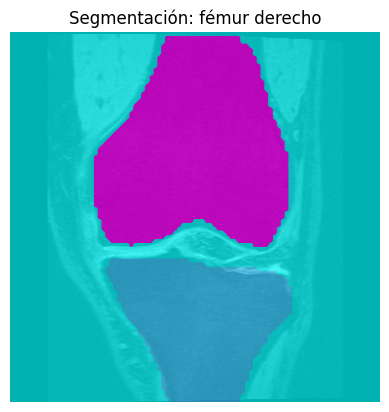

(384, 68, 384)


In [7]:
rodilla = nib.load('segment_output.nii').get_fdata()

# Visualizar un slice con over 
idx = volume.shape[2] // 2  # slice central

%matplotlib inline
plt.imshow(volume[:, :, idx], cmap='gray')
plt.imshow(np.rot90(rodilla[:, idx, :]), alpha=0.7, cmap='cool')  # superposición
plt.title("Segmentación: fémur derecho")
plt.axis("off")
plt.show()
print(rodilla.shape)

In [8]:
%matplotlib inline
def show_slice(idx):
    plt.imshow(volume[:, :, idx], cmap='gray')
    plt.imshow(np.rot90(rodilla[:, -idx, :]), alpha=0.4, cmap='spring') ##TUVIMOS QUE GIRAR LA IMAGEN PARA QUE COINCIDA
    title = dicom_files[idx].get("InstanceNumber", f"Slice {idx}")
    plt.title(f"Slice: {title}")
    plt.axis("off")
    plt.show()

interact(show_slice, idx=(0, volume.shape[2] - 1))

interactive(children=(IntSlider(value=34, description='idx', max=68), Output()), _dom_classes=('widget-interac…

<function __main__.show_slice(idx)>

En la total seg knee, tenemos diferentes formas de leere archivos, así como visualización diferente y así.

Esta es solo una prueba para ver que funcione correctamente totalsegmentator en la pc. Ya de ahí podemos partir a generar la segmentación en otra okei :D

In [6]:
input_path = "Prueba1007_2/11405_thin_st_l-ext.nii.gz"  # Carpeta con  DICOMs

output_path = "./Prueba1007_2Seg/olamultilabel"  # Carpeta donde guardar segmentación

totalsegmentator(input_path, output_path, fast=False, task='appendicular_bones',ml = True, higher_order_resampling= True,
                 remove_small_blobs=False, license_number=licencia)


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Resampling...
  Resampled in 17.47s
Predicting...


100%|██████████| 128/128 [00:13<00:00,  9.40it/s]


  Predicted in 20.69s
Resampling...
Saving segmentations...
  Saved in 0.54s
